In [16]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn import linear_model, model_selection, metrics
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [18]:
df['age_death'] = np.where(df['DEATH_EVENT'] == 1, df['age'], 0)

In [19]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,75.0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,55.0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,65.0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50.0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0.0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0.0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,0.0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0.0


<Axes: >

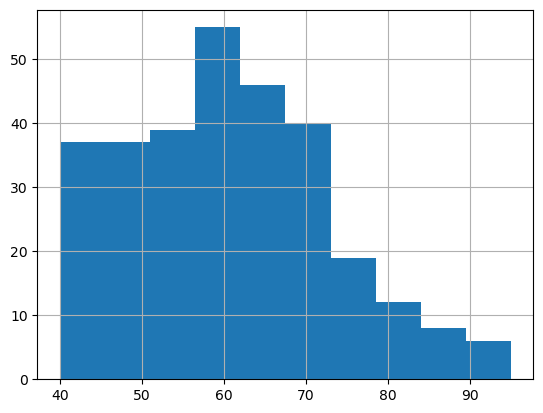

In [20]:
df['age'].hist()

<BarContainer object of 2 artists>

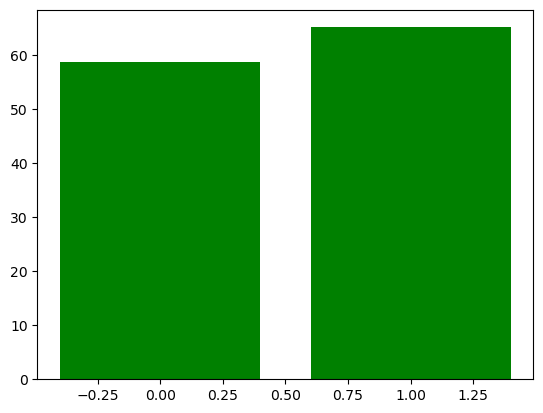

In [21]:
mean_age_death = df.groupby('DEATH_EVENT', as_index=False)['age'].mean()
plt.bar(mean_age_death['DEATH_EVENT'], mean_age_death['age'], color = 'green')

(array([ 8., 12.,  6., 20., 10., 15.,  7.,  8.,  5.,  5.]),
 array([42. , 47.3, 52.6, 57.9, 63.2, 68.5, 73.8, 79.1, 84.4, 89.7, 95. ]),
 <BarContainer object of 10 artists>)

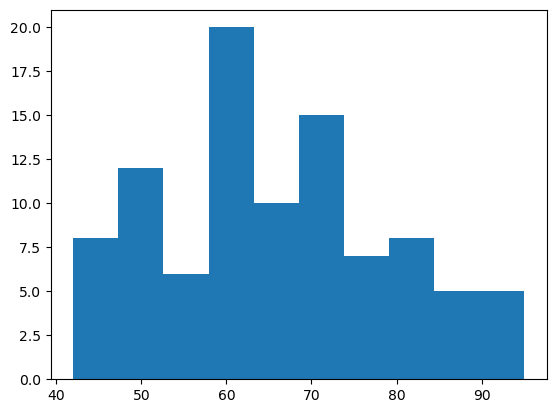

In [22]:
x = np.array(df['age_death'])
plt.hist(x[x != 0])

In [23]:
regr = linear_model.LogisticRegression(max_iter=1000)

In [24]:
y = df.values[:,12]
x = df.values[:,0:12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.3)

final = regr.fit(x_train, y_train)

pred = regr.predict(x_test)
print(metrics.accuracy_score(y_test,pred))

0.8


In [29]:
df.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
age_death                       20.938686
dtype: float64

In [26]:
value = input("Please enter 12 numbers in the following format: 1 2 3 4     ")
val_list = list(value.split(" "))
user_val = [float(x) for x in val_list]
user_val

Please enter 12 numbers in the following format: 1 2 3 4     75 0 582 0 20 1 265000 1.9 130 1 0 4


[75.0, 0.0, 582.0, 0.0, 20.0, 1.0, 265000.0, 1.9, 130.0, 1.0, 0.0, 4.0]

In [27]:
print(final.predict([user_val]))

[1.]
